In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')
import metavars
metavars.lake_name = 'synth'        # set to 'synth' or one of the lakes in the inventory
lake_name = metavars.lake_name
from params import N_sc,x0,y0,t0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

xp,yp = np.meshgrid(x0,y0)
rad = 4
bdry = 1+0*xp
bdry[np.sqrt((xp)**2+(yp)**2)>rad] = 0

In [7]:
def get_means(N,w):
    N_mean = np.zeros(N.shape[0])
    w_mean = np.zeros(w.shape[0])
    for i in range(N.shape[0]):
        N_i = N[i,:,:]
        w_i = w[i,:,:]
        N_mean[i] = N_i[bdry>1e-2].mean()
        w_mean[i] = w_i[bdry>1e-2].mean()
    return N_mean, w_mean        


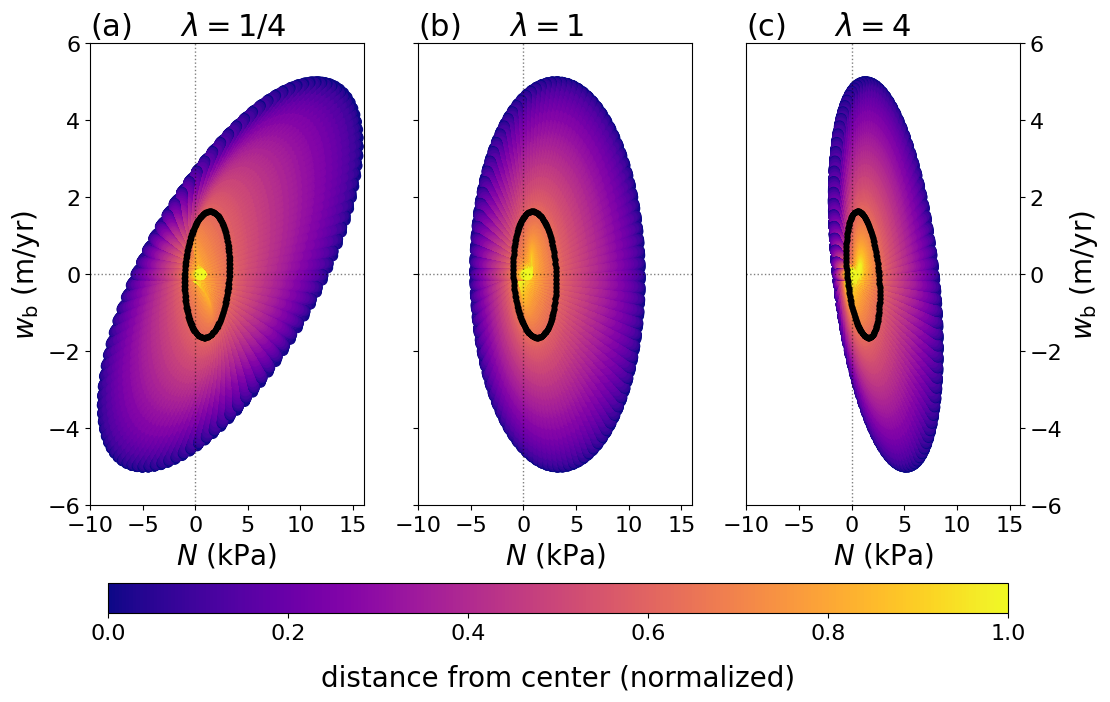

In [15]:
j0 = int(0.5*t0.size)
fig = plt.figure(figsize=(12,6))
plt.subplot(131)
plt.title(r'(a) $\quad$ $\lambda={1}/{4}$',fontsize=22,loc='left')
dir_name = '../results/N_lamda_0.2'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(xp[:,:]**2 + yp[:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)

N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten()*N_sc/1e3,w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=20)
plt.ylim(-6,6)
plt.xlim(-10,16)

cbaxes = fig.add_axes([0.14, -0.07, 0.75, 0.05])  
cbar = plt.colorbar(sc,orientation='horizontal',cax = cbaxes)
cbar.set_label(r'distance from center (normalized)',fontsize=20,labelpad=15)
cbar.ax.tick_params(labelsize=16)


plt.subplot(132)
plt.title(r'(b) $\quad$ $\lambda=1$',fontsize=22,loc='left')
dir_name = '../results/N_lamda_1.0'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(xp[:,:]**2 + yp[:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)
N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten()*N_sc/1e3,w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)
plt.xticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.gca().yaxis.set_ticklabels([])
plt.ylim(-6,6)
plt.xlim(-10,16)


plt.subplot(133)
plt.title(r'(c) $\quad$ $\lambda=4$',fontsize=22,loc='left')
dir_name = '../results/N_lamda_4.0'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)

for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(xp[:,:]**2 + yp[:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)
N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten()*N_sc/1e3,w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=20)
plt.ylim(-6,6)
plt.xlim(-10,16)
# plt.tight_layout()
plt.savefig('fig4',bbox_inches='tight')
plt.show()
plt.close()

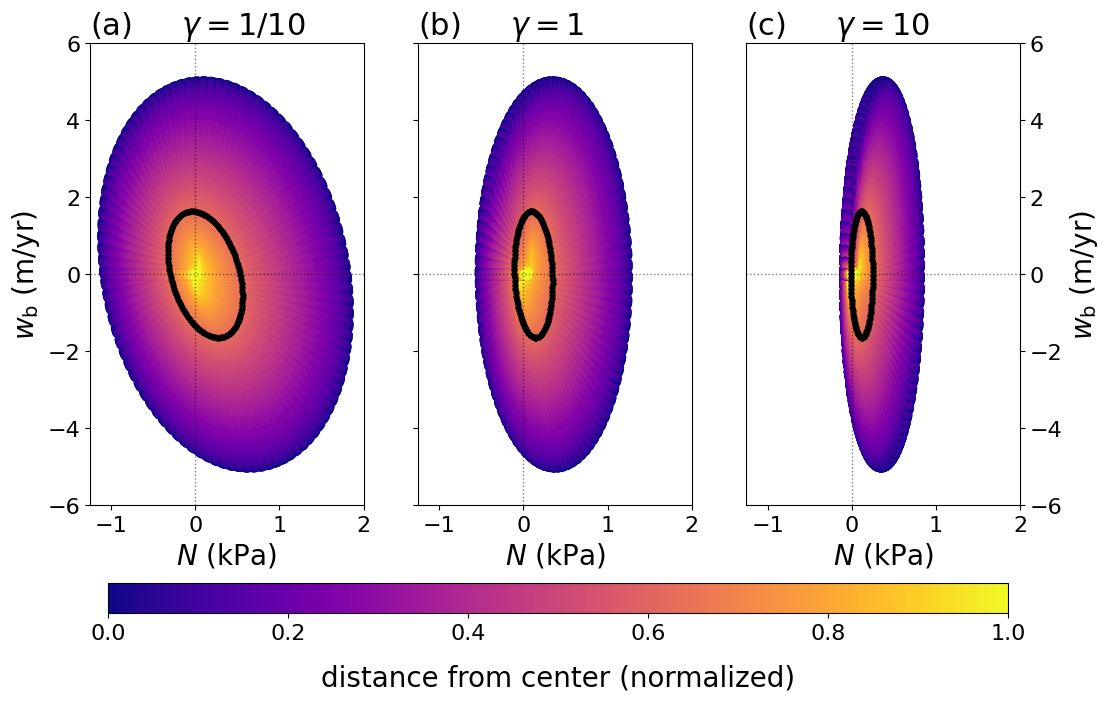

In [12]:
j0 = int(0.5*t0.size)
fig = plt.figure(figsize=(12,6))
plt.subplot(131)
plt.title(r'(a) $\quad$ $\gamma={1}/{10}$',fontsize=22,loc='left')
dir_name = '../results/N_gamma_0.1'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(x[i,:,:]**2 + y[i,:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)

N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten(),w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=20)
plt.ylim(-6,6)
plt.xlim(-1.25,2)

cbaxes = fig.add_axes([0.14, -0.07, 0.75, 0.05])  
cbar = plt.colorbar(sc,orientation='horizontal',cax = cbaxes)
cbar.set_label(r'distance from center (normalized)',fontsize=20,labelpad=15)
cbar.ax.tick_params(labelsize=16)


plt.subplot(132)
plt.title(r'(b) $\quad$ $\gamma=1$',fontsize=22,loc='left')
dir_name = '../results/N_gamma_1.0'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(x[i,:,:]**2 + y[i,:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)
N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten(),w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)
plt.xticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.gca().yaxis.set_ticklabels([])
plt.ylim(-6,6)
plt.xlim(-1.25,2)


plt.subplot(133)
plt.title(r'(c) $\quad$ $\gamma=10$',fontsize=22,loc='left')
dir_name = '../results/N_gamma_10.0'
N = np.load(dir_name+'/N.npy')
w = np.load(dir_name+'/w.npy')
plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)

for i in np.arange(j0,t0.size,1): 
    d = (np.sqrt(x[i,:,:]**2 + y[i,:,:]**2)[bdry>1e-2]).flatten()
    d = d/np.max(d)
    # plt.plot(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),'o',color='royalblue',markersize=1,alpha=0.1)
    sc = plt.scatter(N[i,:,:][bdry>1e-2].flatten(),w[i,:,:][bdry>1e-2].flatten(),s=50,cmap='plasma',c=d)
N_mean, w_mean = get_means(N,w)
plt.plot(N_mean[j0:None].flatten(),w_mean[j0:None].flatten(),'o',color='k',markersize=3,alpha=1)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N$ (kPa)',fontsize=20)
plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=20)
plt.ylim(-6,6)
plt.xlim(-1.25,2)
# plt.tight_layout()
plt.savefig('fig5',bbox_inches='tight')
plt.show()
plt.close()